# Comparison of recirculation for a dimpled ellipsoidal bubble

## Read fields from Basilisk and OpenFOAM simulations

In [1]:
import helper_module as hm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rc('text', usetex=True)

# Basilisk name amd simulation time
name = "dell_l17"
time = 50

data_path = "../data/"
output_path = "../output/"

bbox = dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5')

def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

In [7]:
# logfile, rise velocity
log_path = data_path + name + "/log." + name + ".csv"
log = hm.Logfile(log_path)
log.read_logfile(usecols=['time', 'u_x', 'x'])
row = log.find_closest("time", time)
U_b = row.u_x.values[0]

# simulation data
field_path = data_path + "{:s}_vel_t{:2d}.csv".format(name, time)
basilisk = hm.CenterFieldValues2D(field_path, [0.0, row.x.values[0]], [0.0, row.u_x.values[0]])
field_path = data_path + "single_phase/" + name + "/flow_steady_1/reflect_centers.csv"
of_pyto = hm.CenterFieldValues2D(field_path, [0.0, 0.0], [0.0, 0.0], True)
field_path = data_path + "single_phase/" + name + "/flow_steady_slip_1/reflect_centers.csv"
of_slip = hm.CenterFieldValues2D(field_path, [0.0, 0.0], [0.0, 0.0], True)
    
print("Rise velocity:\n", U_b)

Successfully read file ../data/dell_l17/log.dell_l17.csv
Successfully read file ../data/dell_l17_vel_t50.csv
Successfully read file ../data/single_phase/dell_l17/flow_steady_1/reflect_centers.csv
Successfully read file ../data/single_phase/dell_l17/flow_steady_slip_1/reflect_centers.csv
Rise velocity:
 0.55113413


## Plot streamlines

In [8]:
def get_mesh(x_max, y_min, y_max, nx, ny):
    xi = np.linspace(0.0, x_max, nx)
    yi = np.linspace(y_min, y_max, ny)
    Xi, Yi = np.meshgrid(xi, yi)
    return xi, yi, Xi, Yi

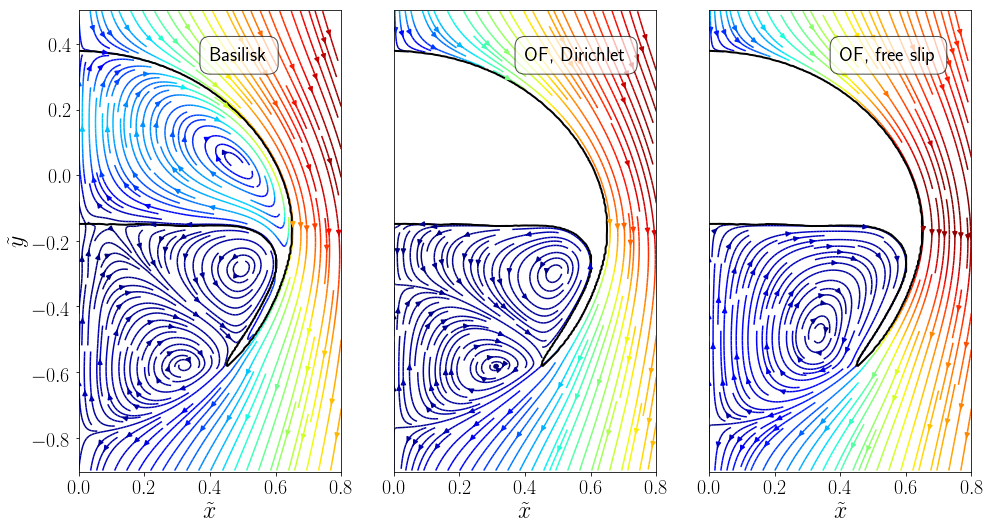

In [16]:
fig, axarr = plt.subplots(1, 3, figsize=(hm.figure_width, 8.5))

y_min = -0.9
y_max = 0.5
x_max = 0.8
nx = 200
ny = int(nx * (y_max - y_min) / x_max)
labels = ["Basilisk", "OF, Dirichlet", "OF, free slip"]

xi, yi, Xi, Yi = get_mesh(x_max, y_min, y_max, nx, ny)
vol_f =  basilisk.interpolate_volume_fraction(Xi, Yi)
vol_f_mask = np.where(vol_f < 0.5, 0, 1.0)
axarr[0].set_ylabel(r"$\tilde{y}$", fontsize=hm.fontsize_label)
for j, field in enumerate([basilisk, of_pyto, of_slip]):
    mag_U = field.interpolate_velocity(Xi, Yi, True, True)
    if j is 0:
        U_x, U_y = field.interpolate_velocity(Xi, Yi, True, False)
    else:
        U_y, U_x = field.interpolate_velocity(Xi, Yi, True, False)
        U_y *= vol_f_mask
        U_x *= vol_f_mask
    axarr[j].streamplot(Xi, Yi, U_x, U_y, color=mag_U/U_b,
                        cmap='jet', density=(1.5, 3.0), minlength=0.1, maxlength=8.0)
    axarr[j].contour(xi, yi, vol_f, levels=[0.5], colors=['k'], linewidths=2.0)
    axarr[j].axis('equal')
    axarr[j].tick_params(labelsize=hm.fontsize_tick)
    axarr[j].set_xlim(0.0, x_max)
    axarr[j].set_ylim(y_min, y_max)
    if j > 0: axarr[j].set_yticks([])
    axarr[j].set_xlabel(r"$\tilde{x}$", fontsize=hm.fontsize_label)
    axarr[j].text(0.4, 0.35, labels[j], fontsize=hm.fontsize_legend, bbox=bbox)

savefig("of_vs_basilisk_streamlines")